In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
data=pd.read_excel('../catering_sale.xls')
data

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
...,...,...
196,2014-08-06,2915.8
197,2014-08-05,2618.1
198,2014-08-04,2993.0
199,2014-08-03,3436.4


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.feature_extraction import DictVectorizer

data=[{'name':'zhangsan','age':24},{'name':'lisi','age':20}]
#onehot独热编码(超参数) sparse=True开启稀疏矩阵记录
transfer=DictVectorizer(sparse=False) #转换器对象
data=transfer.fit_transform(data) #调用fit_transform转化
print("return result is:\n",data)
print("feature name:",transfer.get_feature_names_out(),"\n")


return result is:
 [[24.  0.  1.]
 [20.  1.  0.]]
feature name: ['age' 'name=lisi' 'name=zhangsan'] 



归一化的目的就是使得预处理的数据被限定在一定的范围内（比如[0,1]或者[-1,1]），从而消除奇异样本数据导致的不良影响。
奇异样本数据是指相对于其他输入样本特别大或特别小的样本矢量（即特征向量）。奇异样本数据的存在会引起训练时间增大，同时也可能导致无法收敛
归一化有如下好处，即：
1）归一化后加快了梯度下降求最优解的速度，也即加快训练网络的收敛性；
2）归一化有可能提高精度

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #归一化API


a=[20,30,40]
b=[12,13,14]
c=[32,33,34]

df=pd.DataFrame([a,b,c],columns=['a','b','c']) #创建DataFrame
transfer=MinMaxScaler(feature_range=(0,1)) #实例转换器对象
date=transfer.fit_transform(df[['a','b','c']]) #调用fit_transform转化
print(date)

[[0.4        0.85       1.        ]
 [0.         0.         0.        ]
 [1.         1.         0.76923077]]


# 0-1区间 概率问题↑

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler #标准化API


a=[20,30,40]
b=[12,13,14]
c=[32,33,34]

df=pd.DataFrame([a,b,c],columns=['a','b','c']) #创建DataFrame
transfer=StandardScaler() #实例标准化对象
date=transfer.fit_transform(df[['a','b','c']]) #调用fit_transform转化
print(date)

[[-0.16222142  0.52990781  0.95961623]
 [-1.13554995 -1.40047065 -1.37944833]
 [ 1.29777137  0.87056284  0.4198321 ]]


# 均值为0 方差1的正态分布↑

C:\Users\Latticeshop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

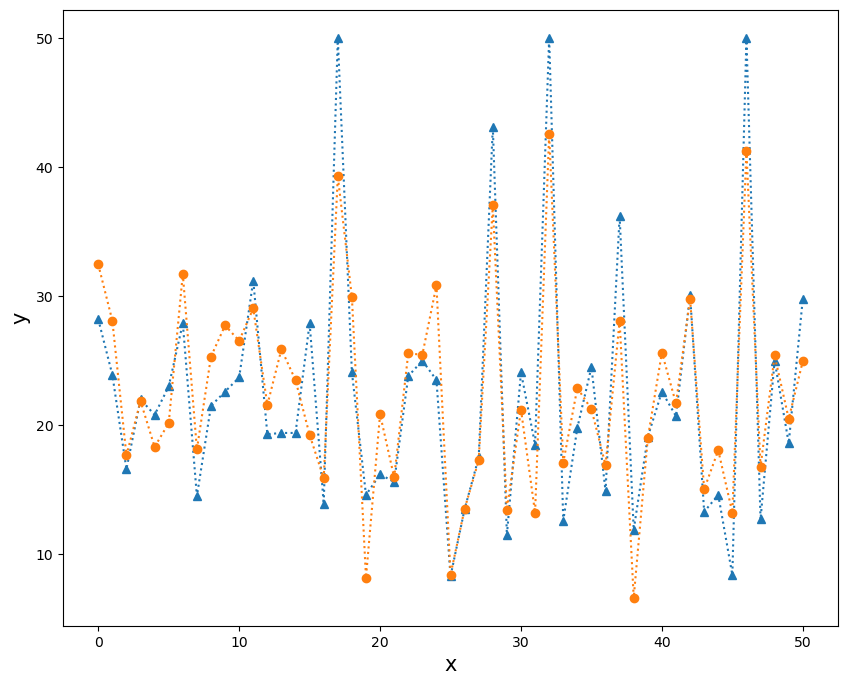

In [1]:
from sklearn.datasets import load_boston #导入数据——波士顿房价
from sklearn.linear_model import SGDRegressor #线性回归的SDG算法（随机梯度下降算法）
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.preprocessing import StandardScaler #数据标准化
import matplotlib.pyplot as plt

boston = load_boston()#加载数据集
#将数据集划成测试集和训练集
train_data, test_data, train_result, test_result = train_test_split(boston.data, boston.target, test_size=0.1, random_state=1)
#数据标准化
transfer=StandardScaler()
train_data=transfer.fit_transform(train_data)#实例化一个标准化对象
test_data=transfer.fit_transform(test_data)#调用fit_transform
#线性回归的实现
estimator=SGDRegressor()#实例化一个线性回归对象
estimator.fit(train_data,train_result)#填充数据训练
#预测
predict_result=estimator.predict(test_data)
#画图可视化
plt.figure(figsize=(10,8))
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.plot([i for i in range(len(test_data))],test_result,linestyle=':',marker='^',label='true')
plt.plot([i for i in range(len(test_data))],predict_result,linestyle=':',marker='o',label='predict')
plt.show()


In [2]:
import torch
print(torch.version)

<module 'torch.version' from 'C:\\Users\\Latticeshop\\anaconda3_2022\\lib\\site-packages\\torch\\version.py'>
